<a href="https://colab.research.google.com/github/RKulagowska/Machine_learning_bootcamp/blob/main/09_Polynimial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn 

np.random.seed(42)
np.set_printoptions(precision= 6, suppress = True )
sns.set(font_scale=1.3)
sklearn.__version__


'1.0.2'

# Polynomial Regression - Regresja wielowymiarowa

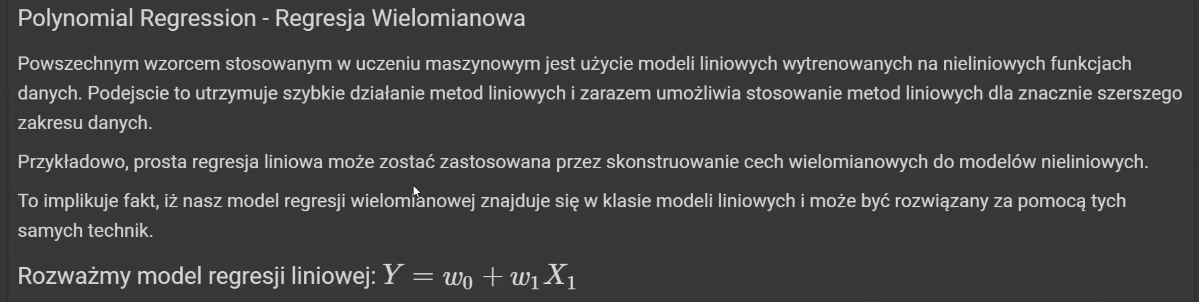

# Wygenerowanie danych 

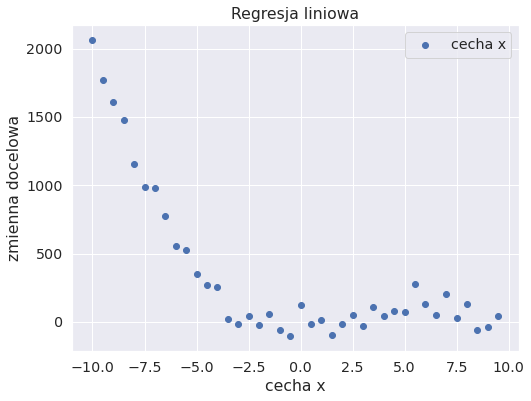

In [5]:
x = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -x**3 + 10*x**2 - 2*x + 3 + noise 
x = x.reshape(40,1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label= 'cecha x')
plt.legend()
plt.show()


# Model liniowy

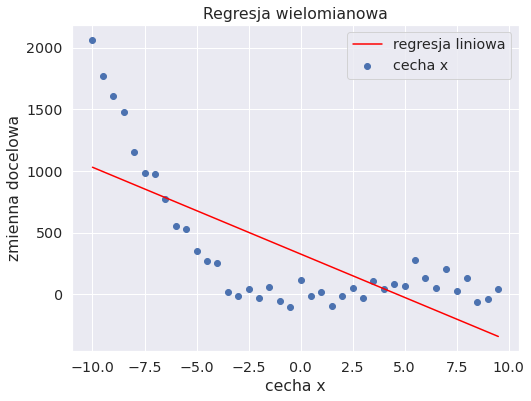

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x,y)
y_pred_lin = regressor.predict(x)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x,y,label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')

plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_lin)

0.5342822962632471

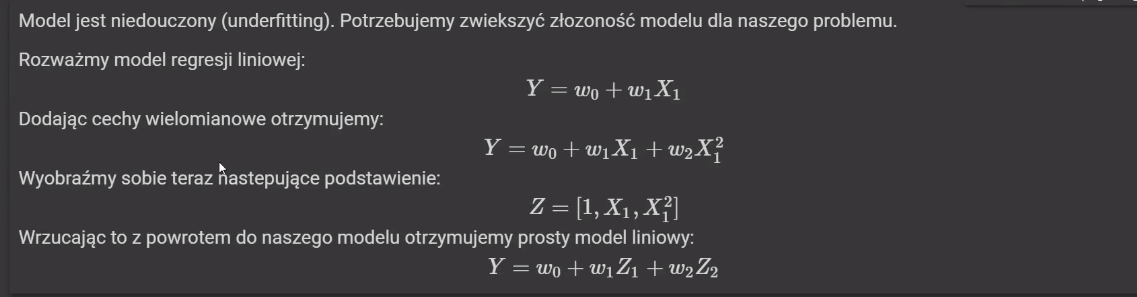

# Ekstrakcja cech wielowymiarowych - stopień 2

In [19]:
df = pd.DataFrame(data={'x':x.ravel()})
df.head(10)

,x
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [21]:
x_poly.shape

(40, 3)

In [22]:
df = pd.DataFrame(x_poly)
df.columns = ['1','x','x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


# Dopasowanie modelu 

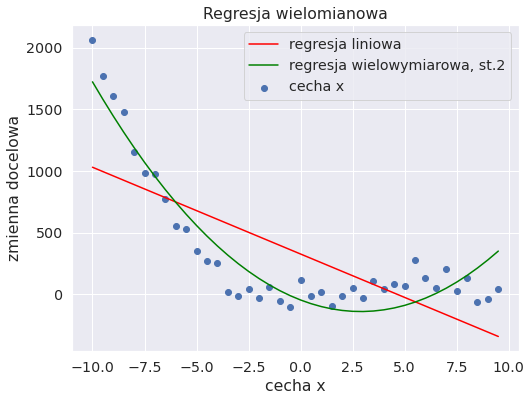

In [23]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_poly,y)
y_pred_2 = regressor_poly.predict(x_poly)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x,y,label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_2, c='green', label='regresja wielowymiarowa, st.2')
plt.legend()
plt.show()

In [24]:
r2_score(y,y_pred_2)

0.8951163003458433

# Ekstrakcja cech wielowymiarowych - stopień 3

In [25]:
poly = PolynomialFeatures(degree=3)

x_poly_3 = poly.fit_transform(x)
x_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

In [26]:
x_poly_3.shape

(40, 4)

In [27]:
df = pd.DataFrame(x_poly_3)
df.columns = ['1','x','x^2','x^3']
df.head(10)

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000
5,1.0,-7.5,56.25,-421.875
6,1.0,-7.0,49.00,-343.000
7,1.0,-6.5,42.25,-274.625
8,1.0,-6.0,36.00,-216.000
9,1.0,-5.5,30.25,-166.375


# Dopasowanie modelu

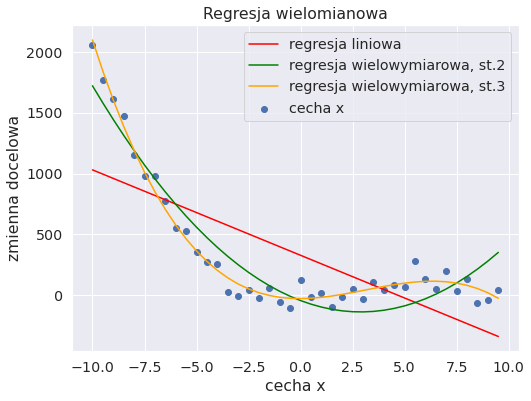

In [32]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(x_poly_3,y)
y_pred_3 = regressor_poly_3.predict(x_poly_3)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x,y,label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_2, c='green', label='regresja wielowymiarowa, st.2')
plt.plot(x, y_pred_3, c='orange', label='regresja wielowymiarowa, st.3')
plt.legend()
plt.show()

In [33]:
r2_score(y,y_pred_3)

0.9841708613657418

# Porównanie metryk

In [34]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [35]:
results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]    
    })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.534282,316.267126,143775.153332,379.176942
1,regresja wielomianowa st. 2,0.895116,155.977929,32379.421866,179.942829
2,regresja wielomianowa st. 3,0.984171,57.572030,4886.730343,69.905152


In [36]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [37]:
px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [38]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

In [39]:

px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')